In [71]:
import pandas as pd

sim = pd.read_json("/Users/massoudmaher/data/tpois_ran_walk.json")

In [72]:
def cast_n_sort(df_dict):
    df = pd.DataFrame(df_dict)
    df.index = df.index.astype("int")
    return df.sort_index()

sim["cn_data"] = [cast_n_sort(x) for x in sim["cn_data"]]
sim["plinkage"] = [cast_n_sort(x) for x in sim["plinkage"]]
sim["clustering"] = [cast_n_sort(x) for x in sim["clustering"]]
#
#display(sim.columns)
print(sim.shape)

(100, 17)


# Example clustering

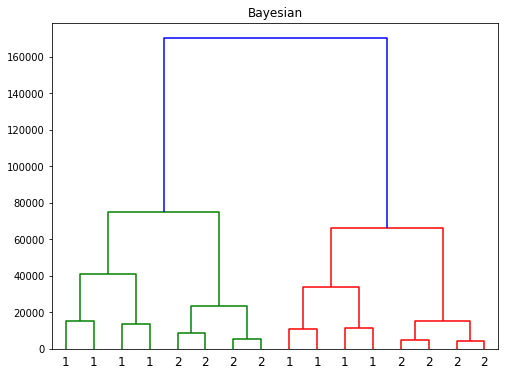

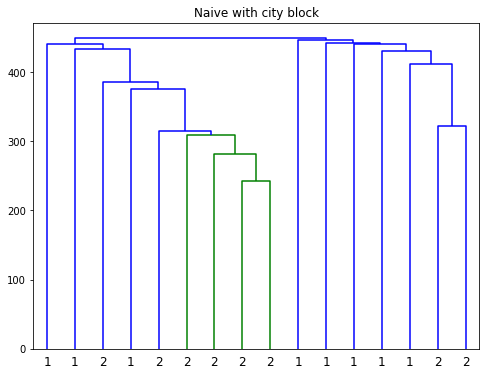

In [82]:
# Bayesian hierarchical
from scipy.cluster.hierarchy import dendrogram
from scgenome.cncluster import bayesian_cluster
from scgenome.simulation import get_plot_data
import matplotlib.pyplot as plt
import numpy as np

eg_ind = 73
cn_data = sim.loc[eg_ind,"cn_data"].copy()
n_states = sim.loc[eg_ind,"max_cn"]
alpha = sim.loc[eg_ind,"alpha"]
bhc_linkage = sim.loc[eg_ind,"plot_data"]
bhc_plinkage = sim.loc[eg_ind,"plinkage"]
naive_linkage = sim.loc[eg_ind,"naive_linkage"]
cluster_ids = list(pd.Series(sim.loc[eg_ind,"cell_id"]).str[2])

fig = plt.figure(figsize=(8, 6))
f = dendrogram(bhc_linkage, labels=cluster_ids)
txt = fig.axes[0].set_title("Bayesian")

fig = plt.figure(figsize=(8, 6))
f = dendrogram(naive_linkage, labels=cluster_ids)
txt = fig.axes[0].set_title("Naive with city block")

In [74]:
all_sim = pd.concat(list(sim["plinkage"]))
all_sim.head()

,i,j,r_merge,naive_dist,log_like,i_count,j_count,merge_count,dist
0,9,11,-5594.562331,28.193182,-5597.167501,1,1,2,5594.562331
1,8,12,-6778.561168,24.120467,-6781.166338,1,1,2,6778.561168
2,10,14,-7547.105025,27.789437,-7549.710195,1,1,2,7547.105025
3,7,13,-9479.377614,34.107227,-9481.982784,1,1,2,9479.377614
4,1,15,-9797.192799,35.982038,-9799.797970,1,1,2,9797.192799


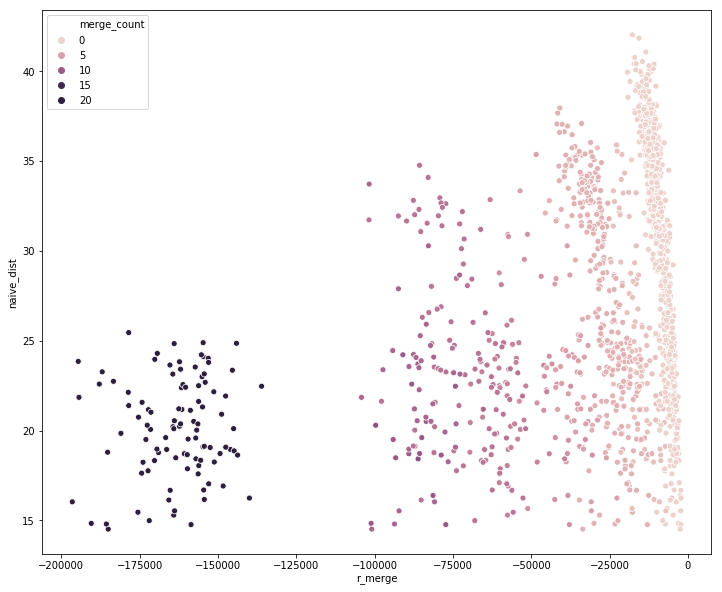

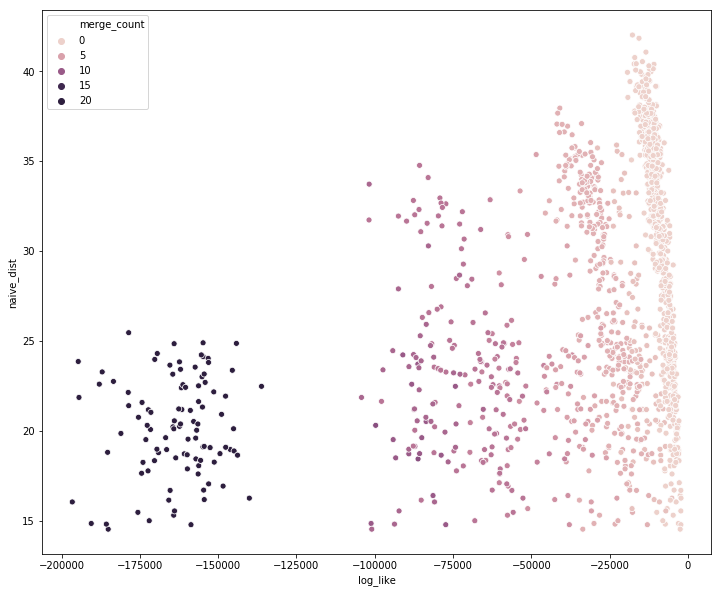

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,10))
ax = sns.scatterplot(data=all_sim, x="r_merge", y="naive_dist", hue="merge_count")

fig = plt.figure(figsize=(12,10))
sns.scatterplot(data=all_sim, x="log_like", y="naive_dist", hue="merge_count")

In [76]:
from scipy.stats import pearsonr
print(pearsonr(all_sim["r_merge"], all_sim["naive_dist"])[0]**2 )
print(pearsonr(all_sim["log_like"], all_sim["naive_dist"])[0]**2)

0.13313831584341068
0.13316749727381114


For ease, going to only use 500 bin

/Users/massoudmaher/Documents/Code/scgenome/venv/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Prop correct -- Bayesian')

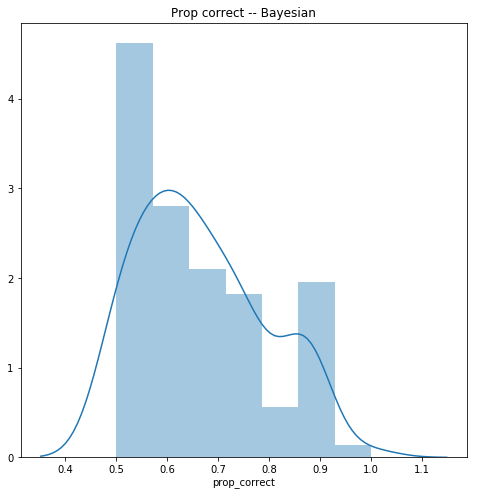

In [78]:
import seaborn as sns
fig = plt.figure(figsize=(8,8))
sns.distplot(sim["prop_correct"])
plt.title("Prop correct -- Bayesian")

0     0.8750
1     0.6250
10    0.6250
11    0.6250
12    0.5000
13    0.6250
14    0.6250
15    0.5000
16    0.5625
17    0.7500
18    0.8750
19    0.6250
2     0.5625
20    0.5625
21    0.6250
22    0.7500
23    0.6250
24    0.6875
25    0.6875
26    0.6250
27    0.8750
28    0.6250
29    0.5000
3     0.6875
30    0.5625
31    0.7500
32    0.5000
33    0.8750
34    0.5625
35    1.0000
       ...  
72    0.8750
73    0.5000
74    0.7500
75    0.6250
76    0.8750
77    0.5000
78    0.6250
79    0.6875
8     0.8750
80    0.5625
81    0.6250
82    0.5625
83    0.5000
84    0.8125
85    0.8750
86    0.7500
87    0.5000
88    0.6875
89    0.7500
9     0.5000
90    0.7500
91    0.5625
92    0.6250
93    0.6250
94    0.6250
95    0.5000
96    0.8750
97    0.7500
98    0.5625
99    0.8750
Name: prop_correct, Length: 100, dtype: float64